**Predicting cab booking cancellations**

In this kernal, I am going to predict cab booking cancellations. Ensemble learning methods like Bagging Classifier and Voting Classifiers are used to boost the accuracy of predictions. If you are new to the words "Ensemble Learning", it's advisable to visit this link -  [Ensemble Learning Sklearn](http://scikit-learn.org/stable/modules/ensemble.html). 

**Contents**
1. Import Libraries (Includes ensemble learners).
2. Load the dataset and understanding the dataset.
3. Data Cleaning.
4. Feature Importance.
5. Feature Heatmap.
6. Ensemble Learning Methods
7. Predictions.


**1. Import Libraries**

* Import the libraries needed to work on the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression

**2. Load Dataset and undertanding the dataset**

* Load the dataset and look at the shape and null values. Null values are needed for basic data cleaning.

In [2]:
df = pd.read_csv('../input/Kaggle_YourCabs_training.csv')
print (df.columns)

print (df.shape)
df.isnull().sum()

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'Cost_of_error'],
      dtype='object')
(43431, 20)


id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
Cost_of_error              0
dtype: int64

**3. Data Cleaning**

* Drop the columns that are not contributing the predictions. These are to be choosen on the basic observations and null value observations.

In [3]:
df = df.drop(['package_id', 'to_city_id', 'from_city_id', 'from_date', 'to_date', 'from_lat', 'from_long', 
              'to_lat', 'to_long', 'from_area_id', 'to_area_id', 'id', 'booking_created'], axis = 1)

df.isnull().sum()

user_id                0
vehicle_model_id       0
travel_type_id         0
online_booking         0
mobile_site_booking    0
Car_Cancellation       0
Cost_of_error          0
dtype: int64

In [4]:
X = df[['Car_Cancellation']]
y = df[['vehicle_model_id', 'travel_type_id', 'online_booking', 'mobile_site_booking', 'Cost_of_error']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**4. Feature Importance**

* Feature Importance is calculated using Random Forest Classifier. It can be clearly observed that "Cost of Error" is out performer.

{'vehicle_model_id': 0.004311058205360982, 'travel_type_id': 0.0007530307581032128, 'online_booking': 0.0030970996291782077, 'mobile_site_booking': 0.003259578358412728, 'Cost_of_error': 0.9885792330489449}


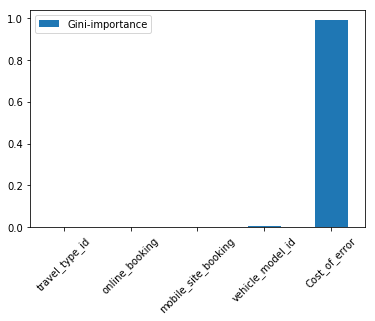

In [5]:
%matplotlib inline

rf = RandomForestClassifier()
rf.fit(y.values, X.values.ravel())

importance = rf.feature_importances_
importance = pd.DataFrame(importance, index = y.columns, columns=['Importance'])

feats = {}
for feature, importance in zip(y.columns,rf.feature_importances_):
    feats[feature] = importance
    
print (feats)
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

**5. Feature HeatMap**

* Correlation of features on each other can be observed using seaborn. It could be observed that most of the features are independent of others making it easy to predict.

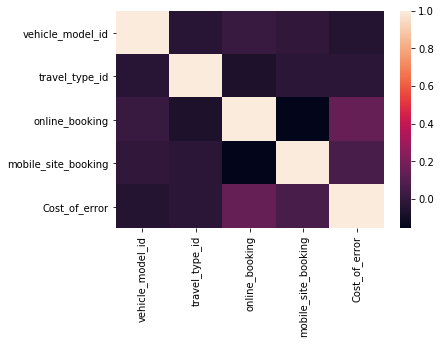

In [6]:
y_cols = y.columns.tolist()
corr = df[y_cols].corr()

sns.heatmap(corr)

**6. Ensemble Learning Models**

* Logistic Regression, Random Forest Classifier, Bagging Classifier and Support Vector Machine are used vote with Voting Classifier, hard voting is made. This model is used to fit and predict data in the following sections.

In [7]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=10)
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5)
clf = SVC(kernel = 'linear')

evc = VotingClassifier(estimators =[('lr', lr),('rf', rf),('bg', bg),('clf', clf)], voting = 'hard')

**7. Making Predictions and Testing**

* The model obtained in the above section is used to fit and predict data.
* Mean Square error and Confusion matrix are provided to give error magnitudes.

In [9]:
evc.fit(y_train, X_train)

predicted_data = evc.predict(y_test)
print ('Mean Squared Error:')
print (mean_squared_error(X_test, predicted_data))
print ('Confusion Matrix:')
print (confusion_matrix(X_test, predicted_data))

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error:
0.0002302290779325429
Confusion Matrix:
[[8049    0]
 [   2  636]]


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
